In [1]:
import zipfile
with zipfile.ZipFile('Copy of devnagari digit.zip', 'r') as zip_ref:
    zip_ref.extractall('Copy of devnagari digit')

In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [5]:
import tensorflow as tf
print(tf.keras.__version__)

3.5.0


In [7]:
import numpy as np
# Simple function f(x) = x^2
def f(x):
    return x ** 2
# Manual derivative (f’(x) = 2x)
def gradient(x):
    return 2 * x
# Update rule: x = x - learning_rate * gradient
x = 5.0
learning_rate = 0.1
for _ in range(10): # Manually optimize for 10 steps
    x -= learning_rate * gradient(x)
    print(f"x: {x}, f(x): {f(x)}")

x: 4.0, f(x): 16.0
x: 3.2, f(x): 10.240000000000002
x: 2.56, f(x): 6.5536
x: 2.048, f(x): 4.194304
x: 1.6384, f(x): 2.68435456
x: 1.31072, f(x): 1.7179869184000003
x: 1.0485760000000002, f(x): 1.0995116277760004
x: 0.8388608000000002, f(x): 0.7036874417766403
x: 0.6710886400000001, f(x): 0.45035996273704976
x: 0.5368709120000001, f(x): 0.2882303761517119


In [11]:
import tensorflow as tf
x = tf.Variable(5.0) # Trainable variable
with tf.GradientTape() as tape:
    y = x ** 2 # y = x^2
grad = tape.gradient(y, x) # Computes dy/dx automatically
print(grad.numpy()) # Output: 10.0

10.0


In [13]:
import numpy as np
import tensorflow as tf
import time
# Create large random matrices
size = (1000, 1000)
A = np.random.rand(*size)
B = np.random.rand(*size)
# NumPy Multiplication
start = time.time()
C_numpy = np.dot(A, B)
print("NumPy Time:", time.time() - start)
# TensorFlow Multiplication (for colab uses GPU Runtime if available)
A_tf = tf.constant(A)
B_tf = tf.constant(B)
start = time.time()
C_tf = tf.matmul(A_tf, B_tf)
print("TensorFlow Time:", time.time() - start)

NumPy Time: 0.03560805320739746
TensorFlow Time: 0.041882991790771484


In [21]:
from tensorflow.keras.layers import Dense

layer = Dense(64, activation='sigmoid') 

In [27]:
import numpy as np

# Dummy dataset
x_train = np.array([[1], [2], [3], [4]])  # Input features
y_train = np.array([[2], [4], [6], [8]])  # Target labels

# Initialize weights randomly
weights = np.random.rand(1, 1)  # Assuming one feature
learning_rate = 0.01

for epoch in range(10):
    # Forward pass
    y_pred = np.dot(x_train, weights)
    # Compute loss
    loss = np.mean((y_pred - y_train) ** 2)
    # Compute gradients manually
    gradients = 2 * np.dot(x_train.T, (y_pred - y_train)) / len(x_train)
    # Update weights
    weights -= learning_rate * gradients

    print(f"Epoch {epoch+1}, Loss: {loss:.4f}")

print("Final weights:", weights)

Epoch 1, Loss: 18.9476
Epoch 2, Loss: 13.6896
Epoch 3, Loss: 9.8908
Epoch 4, Loss: 7.1461
Epoch 5, Loss: 5.1630
Epoch 6, Loss: 3.7303
Epoch 7, Loss: 2.6951
Epoch 8, Loss: 1.9472
Epoch 9, Loss: 1.4069
Epoch 10, Loss: 1.0165
Final weights: [[1.68707834]]


Training set: (17000, 28, 28, 1), Labels: (17000, 10)
Testing set: (3000, 28, 28, 1), Labels: (3000, 10)


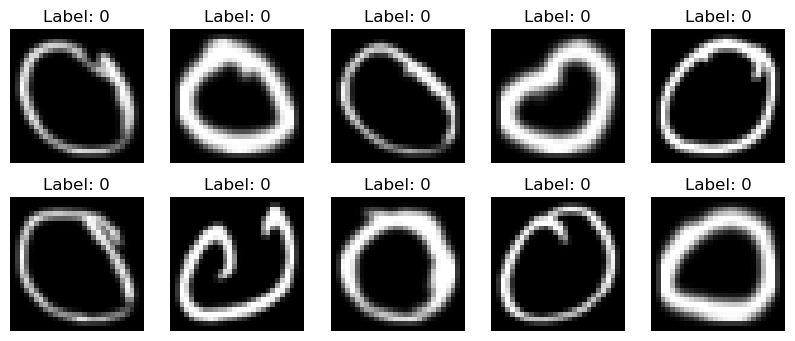

In [95]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image # Import Pillow
# Define dataset paths
train_dir = "Copy of devnagari digit/DevanagariHandwrittenDigitDataset/Train"
test_dir = "Copy of devnagari digit/DevanagariHandwrittenDigitDataset/Test"
# Define image size
img_height, img_width = 28, 28
# Function to load images and labels using PIL
def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder)) # Sorted class names (digit_0, digit_1, ...)
    class_map = {name: i for i, name in enumerate(class_names)} # Map class names to labels
    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            # Load image using PIL
            img = Image.open(img_path).convert("L") # Convert to grayscale
            img = img.resize((img_width, img_height)) # Resize to (28,28)
            img = np.array(img) / 255.0 # Normalize pixel values to [0,1]
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)
# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)
# Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1) # Shape (num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)
# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")
# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.show()

In [96]:
x_train = x_train.reshape(-1, img_height, img_width, 1)
print(f"x_train shape: {x_train.shape}")

x_train shape: (17000, 28, 28, 1)


In [49]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras import layers, models
# from tensorflow.keras.datasets import mnist
# # Load the MNIST dataset
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# # Normalize the images to values between 0 and 1
# x_train, x_test = x_train / 255.0, x_test / 255.0
# # Flatten the 28x28 images into 784-dimensional vectors
# x_train = x_train.reshape(-1, 28 * 28)
# x_test = x_test.reshape(-1, 28 * 28)
# # One-hot encode the labels (0-9) for classification
# y_train = tf.keras.utils.to_categorical(y_train, 10)
# y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [97]:
# Model parameters
import tensorflow as tf
from tensorflow import keras
num_classes = 10
input_shape = (28, 28, 1)
model = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape),
        keras.layers.Flatten(), # Flatten the 28x28 image to a 784-dimensional vector
        keras.layers.Dense(64, activation="sigmoid"),
        keras.layers.Dense(128, activation="sigmoid"),
        keras.layers.Dense(256, activation="sigmoid"),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

In [98]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [99]:
# Model parameters
import tensorflow as tf
from tensorflow import keras
num_classes = 10
input_shape = (28, 28, 1)
def build_functional_model():
    # Input layer
    inputs = keras.Input(shape=input_shape)
    # Flatten layer
    x = keras.layers.Flatten()(inputs)
    # Hidden layers
    x = keras.layers.Dense(64, activation="sigmoid")(x)
    x = keras.layers.Dense(128, activation="sigmoid")(x)
    x = keras.layers.Dense(256, activation="sigmoid")(x)
    # Output layer
    outputs = keras.layers.Dense(num_classes, activation="softmax")(x)
    # Create model
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model
# Build the model
functional_model = build_functional_model()
functional_model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [100]:
model.compile(
    optimizer="sgd", # Stochastic Gradient Descent
    loss="categorical_crossentropy", # Loss function for multi-class classification
    metrics=["accuracy"] # Track accuracy during training
)

In [101]:
history = model.fit(
    x=x_train,                         # Input training data
    y=y_train,                         # Training labels
    batch_size=128,                    # Batch size
    epochs=2000,                       # Number of epochs to train
    validation_data=(x_test, y_test),  # Use test data for validation during training
    validation_split=0.15,             # Reserve 15% of training data for validation (not needed if you provide validation_data)
    callbacks=[                        # Callbacks (e.g., early stopping and model checkpoint)
        keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=4)
    ],
    verbose=1                          # Show progress bar during training
)

Epoch 1/2000
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1013 - loss: 2.3624 - val_accuracy: 0.1003 - val_loss: 2.3037
Epoch 2/2000
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1053 - loss: 2.3030 - val_accuracy: 0.1000 - val_loss: 2.3029
Epoch 3/2000
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1092 - loss: 2.3020 - val_accuracy: 0.1000 - val_loss: 2.3016
Epoch 4/2000
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1029 - loss: 2.3016 - val_accuracy: 0.1000 - val_loss: 2.3007
Epoch 5/2000
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1131 - loss: 2.3010 - val_accuracy: 0.1000 - val_loss: 2.3002
Epoch 6/2000
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1095 - loss: 2.3001 - val_accuracy: 0.1667 - val_loss: 2.2988
Epoch 7/2000
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1148 - loss: 2.2991 - val_accuracy: 0.1293 - val_loss: 2.2973
Epoch 8/2000
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1221 - loss: 2.2980 - 

In [106]:
batch_size = 128
epochs = 2000
# Callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=4 ),
]
# Train the model with callbacks and validation split
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.15,
    callbacks=callbacks
)

Epoch 1/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9868 - loss: 0.0550 - val_accuracy: 0.9910 - val_loss: 0.0453
Epoch 2/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9884 - loss: 0.0490 - val_accuracy: 0.9871 - val_loss: 0.0564
Epoch 3/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9895 - loss: 0.0507 - val_accuracy: 0.9839 - val_loss: 0.0653
Epoch 4/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9890 - loss: 0.0471 - val_accuracy: 0.9827 - val_loss: 0.0740
Epoch 5/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9908 - loss: 0.0473 - val_accuracy: 0.9796 - val_loss: 0.0825


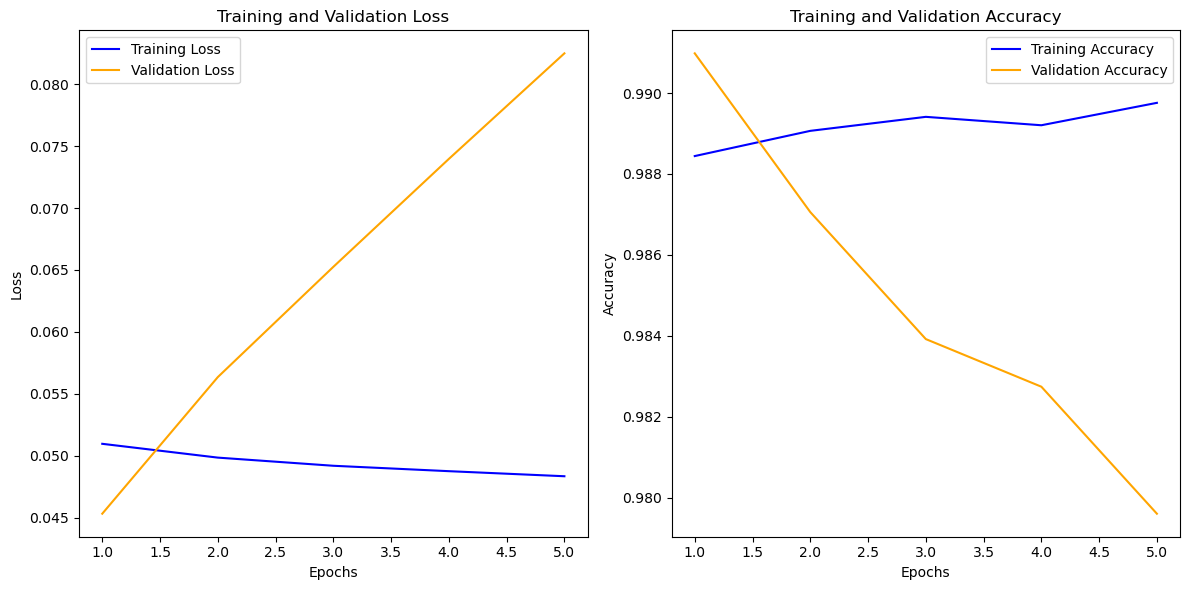

In [108]:
import matplotlib.pyplot as plt
# Assuming ’history’ is the object returned by model.fit()
# Extracting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
# Extracting training and validation accuracy (if metrics were specified)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [110]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

94/94 - 0s - 1ms/step - accuracy: 0.9703 - loss: 0.0994
Test accuracy: 0.9703


In [112]:
# Predict on test data
predictions = model.predict(x_test)
# Convert predictions from probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)
# Check the first prediction
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {np.argmax(y_test[0])}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step
Predicted label for first image: 0
True label for first image: 0


In [116]:
model.save('mnist_fully_connected_model.h5')

In [120]:
loaded_model = tf.keras.models.load_model('mnist_fully_connected_model.h5')